covers various pytorch basics; intended for interactive use.
--matus


# tensor operations

In [1]:
import torch
# torch has its own PRNG seeds.
# setting it here so notebook is deterministic.
torch.manual_seed(0)

In [6]:
import torch
from torchvision.models import resnet18

model = resnet18(pretrained=True)
data = torch.rand(1,3,64,64)
labels = torch.rand(1,1000)



In [16]:
prediction = model(data)
loss = (prediction-labels).norm().sum()
print(loss)
loss.backward()


tensor(32.8551, grad_fn=<SumBackward0>)


In [21]:
optim = torch.optim.Adam(model.parameters(), lr=1e-2)
optim.step()


In [32]:
a = torch.tensor([4., 6.], requires_grad=True)
b = torch.tensor([2., 5.], requires_grad=True)
Q = 3*a**3-b**2
print(Q)
external_grad = torch.tensor([1., 1.])
Q.backward(external_grad)
print(external_grad)

print(a.grad)
print(b.grad)

tensor([188., 623.], grad_fn=<SubBackward0>)
tensor([1., 1.])
tensor([144., 324.])
tensor([ -4., -10.])


In [4]:
# create a non-inclusive range.
torch.arange(8)
torch.arange(7)

tensor([0, 1, 2, 3, 4, 5, 6])

In [9]:
# ..just like a regular python non-inclusive range
torch.tensor(range(8))
torch.tensor([1,2,3], dtype=torch.float64)

tensor([1., 2., 3.], dtype=torch.float64)

In [15]:
# a similar routine, subdividing an interval equally
torch.linspace(0, 1, 5)
torch.linspace(9, 1, 10)
a = torch.tensor([1, 2])

In [20]:
# standard arithmetic operations act coordinate-wise
xs = torch.linspace(0, 1, 5)
xs

tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000])

In [23]:
print(1, xs ** 2) # coordinate-wise squaring
print(2, xs * xs) # coordinate-wise multiplication
print(3, (xs ** 2 - xs * xs) < 1e-16) # compare the above,
print(4, (2.7182818 * xs).log()) # coordinate-wise multiplication and ln

1 tensor([0.0000, 0.0625, 0.2500, 0.5625, 1.0000])
2 tensor([0.0000, 0.0625, 0.2500, 0.5625, 1.0000])
3 tensor([True, True, True, True, True])
4 tensor([   -inf, -0.3863,  0.3069,  0.7123,  1.0000])


In [30]:
a = torch.tensor(1)

In [31]:
# pytorch tensors aren't just floating point
print(1, torch.linspace(0,1,5).dtype)
print(2, torch.arange(5).dtype)
print(3, (torch.arange(5) / 10).dtype)
print(4, (torch.arange(5) // 10).dtype)
print(5, (torch.arange(5) == 0).dtype)

1 torch.float32
2 torch.int64
3 torch.float32
4 torch.int64
5 torch.bool


In [32]:
# arithmetic operations generally convert between types
print(1, torch.arange(5) * torch.arange(5))
print(2, torch.arange(5) * (torch.arange(5) / 1))
print(3, torch.arange(5) + (torch.arange(5) / 1))
print(4, (torch.arange(5) >= 3))
print(5, 2 + (torch.arange(5)>=3) )

1 tensor([ 0,  1,  4,  9, 16])
2 tensor([ 0.,  1.,  4.,  9., 16.])
3 tensor([0., 2., 4., 6., 8.])
4 tensor([False, False, False,  True,  True])
5 tensor([2, 2, 2, 3, 3])


In [47]:
# Not all types support all operations
try:
    #following does manual type conversion
    print(1, torch.arange(5).type(torch.float32).exp())
    print(2, torch.arange(5).exp()) #wow this has changed over time!
except RuntimeError as E:
    print(f"Got exception: '{E}'")

1 tensor([ 1.0000,  2.7183,  7.3891, 20.0855, 54.5981])
2 tensor([ 1.0000,  2.7183,  7.3891, 20.0855, 54.5981])


In [50]:
ten = torch.tensor([1, 2, 3])
ten.exp()

tensor([ 2.7183,  7.3891, 20.0855])

In [58]:
# Here are some basic operations on matrix shapes
ns = torch.arange(12)
print(1, ns)
print(2, ns.reshape(6, -1))
# .view() is similar to .reshape() but reuses storage;
# we'll revisit it later.
print(3, ns.view(3,-1))

1 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
2 tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11]])
3 tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


In [59]:
# We can also reshape into 3 axes
print(1, ns.reshape(2,2,3))
# .reshape() and .view() also understand "-1" which means
# "choose the appropriate size so that this works out".
print(2, ns.reshape(-1,2,3).shape)

1 tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]]])
2 torch.Size([2, 2, 3])


In [65]:
# torch also has "0 axis" (or "0 order") tensors/"arrays".
# these are convenient because they still support .exp(), etc.
e = torch.tensor(2.7182818, dtype = torch.float32)
print(1, e, e.shape, e.log(), e.sin())
# method .item() extracts a python number
print(2, e, e.item())
# lol:
print(3, torch.tensor(2.7182818, dtype = torch.float64).item())
try:
    # .item() only works on single-element tensors
    print(4, torch.ones(3, 4))
    print(5, torch.zeros(2).item())
except ValueError as E:
    print(6, f"Got exception: '{E}'")

1 tensor(2.7183) torch.Size([]) tensor(1.0000) tensor(0.4108)
2 tensor(2.7183) 2.7182817459106445
3 2.7182818
4 tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
6 Got exception: 'only one element tensors can be converted to Python scalars'


In [66]:
# back to larger tensors,
# _some_ (but not all) operations complain about size mismatch.
try:
    vs = torch.arange(6).reshape(2,3)
    print(1, vs + vs)
    print(2, vs + vs.T)
except RuntimeError as E:
    print(3, f"Got exception: '{E}'")

1 tensor([[ 0,  2,  4],
        [ 6,  8, 10]])
3 Got exception: 'The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 1'


In [80]:
# but some operations _do_ succeed with mismatched shapes!
vs = torch.arange(4)

print(0, vs)
print(0.5, vs.reshape(-1, 1))
print(1, vs.reshape(1, -1) + vs.reshape(-1, 1))
print(2, vs.reshape(1, -1, 1) + vs.reshape(-1, 1, 1) + vs.reshape(1, 1, -1))

0 tensor([0, 1, 2, 3])
0.5 tensor([[0],
        [1],
        [2],
        [3]])
1 tensor([[0, 1, 2, 3],
        [1, 2, 3, 4],
        [2, 3, 4, 5],
        [3, 4, 5, 6]])
2 tensor([[[0, 1, 2, 3],
         [1, 2, 3, 4],
         [2, 3, 4, 5],
         [3, 4, 5, 6]],

        [[1, 2, 3, 4],
         [2, 3, 4, 5],
         [3, 4, 5, 6],
         [4, 5, 6, 7]],

        [[2, 3, 4, 5],
         [3, 4, 5, 6],
         [4, 5, 6, 7],
         [5, 6, 7, 8]],

        [[3, 4, 5, 6],
         [4, 5, 6, 7],
         [5, 6, 7, 8],
         [6, 7, 8, 9]]])


In [82]:
# here's a simpler instance of the same behavior:
torch.ones(4, 4) + torch.arange(4).reshape(-1, 1)

tensor([[1., 1., 1., 1.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.],
        [4., 4., 4., 4.]])

In [94]:
# This can be very convenient:
# here we normalize the rows of a matrix:
X = torch.randn(3,2)
print(X)
print(1, X.norm(dim = 1))
# A few things going on here, I recommend trying this one
# yourself and studying each piece.
X /= X.norm(dim = 1, keepdim = True)
print(X)
print(2, X.norm(dim = 1))

tensor([[ 0.3360,  1.0043],
        [ 1.4007, -1.7722],
        [ 1.5152,  0.3698]])
1 tensor([1.0590, 2.2589, 1.5597])
tensor([[ 0.3173,  0.9483],
        [ 0.6201, -0.7845],
        [ 0.9715,  0.2371]])
2 tensor([1., 1., 1.])


In [95]:
# slicing makes it easy to access submatrices/subtensors
ns = torch.arange(12).reshape(2,6)
print(1, ns)
print(2, ns[0, :]) # first row
print(3, ns[:, 0]) # first column
ms = ns.reshape(2,2,3)
print(4, ms)
print(5, ms[0,0,:])
print(6, ms[0, ...]) # dots mean "all remaining axes/dimensions"
print(7, ms[..., 0])

1 tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])
2 tensor([0, 1, 2, 3, 4, 5])
3 tensor([0, 6])
4 tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]]])
5 tensor([0, 1, 2])
6 tensor([[0, 1, 2],
        [3, 4, 5]])
7 tensor([[0, 3],
        [6, 9]])


In [96]:
print(ns)
# Slicing can also take integer lists as input
print(1, ns[:, [0, 2, 4]])
# Also boolean masks
print(2, ns[:, [ True, False, True, False, True, False]])
try:
    # you can use pytorch integer arrays as well
    print(3, ns[:, torch.arange(2)])
    # but not float arrays
    print(4, ns[:, torch.arange(2) / 1])
except IndexError as E:
    print(5, f"Got exception: '{E}'")

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])
1 tensor([[ 0,  2,  4],
        [ 6,  8, 10]])
2 tensor([[ 0,  2,  4],
        [ 6,  8, 10]])
3 tensor([[0, 1],
        [6, 7]])
5 Got exception: 'tensors used as indices must be long, byte or bool tensors'


In [100]:
# many operations have in-place versions.
# superficially this is good for efficiency reasons.
# more importantly, pytorch does some internal book-keeping
# with autodifferentiation which is lost if you do not do
# in-place operations for variables you wish to compute
# gradients with respect to.
# (This will be clarified later.)
# For now, here are some example in-place operations

v = torch.randn(5,4)
print(v)
print(1, v.norm())
v += v # in-place arithmetic operations
print(v)
v *= 2
print(v)
print(2, v.norm())
v.clamp_(0, float('inf')) # zero out negative values, in-place
print(3, v.norm())

tensor([[-1.3533, -0.2071, -0.2488, -1.2320],
        [ 0.4264, -1.1361, -0.1292, -0.0546],
        [ 0.4083,  1.1264,  1.9351,  1.0077],
        [-1.5072, -0.5087, -1.2426,  1.2846],
        [ 0.2438,  0.5304, -0.0145, -2.2357]])
1 tensor(4.7123)
tensor([[-2.7066, -0.4142, -0.4975, -2.4640],
        [ 0.8527, -2.2722, -0.2585, -0.1092],
        [ 0.8167,  2.2527,  3.8701,  2.0154],
        [-3.0144, -1.0174, -2.4852,  2.5691],
        [ 0.4875,  1.0607, -0.0291, -4.4714]])
tensor([[-5.4132, -0.8284, -0.9950, -4.9280],
        [ 1.7054, -4.5445, -0.5169, -0.2184],
        [ 1.6334,  4.5055,  7.7402,  4.0307],
        [-6.0288, -2.0348, -4.9704,  5.1382],
        [ 0.9751,  2.1215, -0.0581, -8.9429]])
2 tensor(18.8491)
3 tensor(11.5709)


In [101]:
# this step only matters if you have a gpu.
# this line of code is in my pytorch programs, it means
# "variable 'device' is first gpu if available, else cpu".
device = torch.device("cpu" if not torch.cuda.is_available()
                      else "cuda:0")
print(torch.cuda.is_available())
# that didn't put anything on gpu; we manually move things there
ns = torch.arange(4)
ns2 = ns.to(device)
print(1, ns.device, ns2.device)

try:
    # python disallows operations mixing cpu and gpu;
    # this is good, since moving data between them is expensive.
    ns + ns2
    print(2, "no exception: no gpu in use")
except Exception as E:
    print(3, f"pytorch error: {E}")

False
1 cpu cpu
2 no exception: no gpu in use


# matplotlib plotting

In [102]:
import matplotlib.pyplot as plt

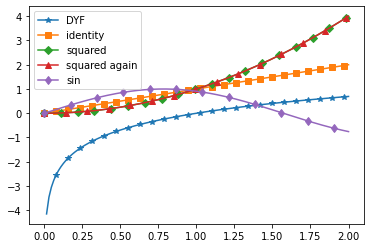

In [113]:
# plt.plot() lets you display many curves.
# it has many parameters; in jupyter and ipythong, you can execute
# "plt.plot?" to see some of them.
# note: gpu data must be moved to cpu before being passed to matplotlib
xs = torch.linspace(0, 2, 128)
plt.plot(xs, xs.log(), marker = '*', markevery = 5, label = "DYF")
plt.plot(xs, xs, marker = 's', markevery = 5,
         label = "identity")
plt.plot(xs, xs ** 2, marker = 'D', markevery = 7,
         label = 'squared')
plt.plot(xs, xs * xs, marker = '^', markevery = 9,
         label = 'squared again')
plt.plot(xs, (2 * xs).sin(), marker = 'd', markevery = 11,
         label = 'sin')
plt.legend()

tensor(3.0492) tensor([-0.8000,  0.4113])
a tensor([-2.7118,  1.3942])


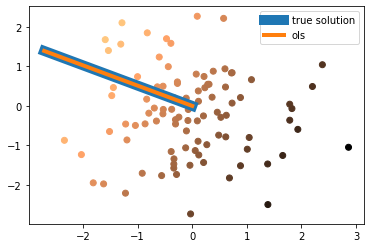

In [162]:
# We can put scatterplots and curve plots in the same figure.
# if invoking this from a python script, you'd need to do 
# plt.clf()
# to clear the figure after the previous one
# (and also plt.savefig() or plt.show() to display).
X = torch.randn(100, 2) # create some random data
u = torch.randn(2) # sample a random "correct" linear predictor
# pick a norm for u that has easy visualization:
print(X.norm(dim=1).max(), u)
u *= X.norm(dim = 1).max() / u.norm()
print("a", u)

y = X @ u # label data according to the "planted" predictor
# scatterplot of data, y given by color:
plt.scatter(
    X[:, 0],
    X[:, 1],
    # color according to y:
    c = y,    
    # c = (y - y.min()) / (y.max() - y.min()),
    cmap = "copper",
)
# note that these plots are the weight vectors, not decision boundary
plt.plot([0, u[0]], [0, u[1]], lw = 10, label = "true solution")
ols = X.pinverse() @ y
plt.plot([0, ols[0]], [0, ols[1]], lw = 4, label = "ols")
plt.plot()
plt.legend()

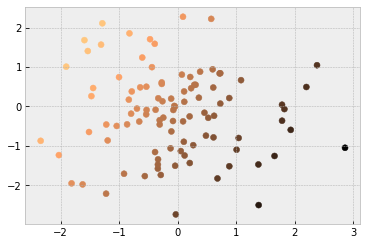

In [167]:
# matplotlib has many features; here's a cute one to restyle a plot:
with plt.style.context("bmh"):
    plt.scatter(
        X[:, 0],
        X[:, 1],
        # color according to y:
        c = (y - y.min()) / (y.max() - y.min()),
        cmap = "copper",
    )

# autodifferentiation

In [168]:
# let's go back to the scatterplot from before:
print(X.shape, u.shape, y.shape)
# we'll find another with "manual" gradient descent
v = torch.zeros(2)
# another with automatic gradient computation
w = torch.zeros(2, requires_grad = True)
# another with automatic gradient computation
# but also using torch.optim
z = torch.zeros(2, requires_grad = True)
# this "requires_grad = True" means
# "whenever this object appears in expressions, track how it is used,
# so we can compute gradients later"
print(v)
print(w)
# hey matus, you know, no one understands your contour plot function


torch.Size([100, 2]) torch.Size([2]) torch.Size([100])
tensor([0., 0.])
tensor([0., 0.], requires_grad=True)


In [169]:
# Can directly modify requires_grad
q = torch.randn(5,5)
print(1, q.requires_grad)
q.requires_grad = True
print(2, q.requires_grad)
q.requires_grad_(False)
print(3, q.requires_grad)

1 False
2 True
3 False


In [170]:
print(1, torch.randn(5,5) @ torch.randn(5, requires_grad = True))
print(2, torch.randn(5,5) @ torch.randn(5))

1 tensor([-0.7448, -1.0985,  4.6895,  3.1548,  2.0440], grad_fn=<MvBackward0>)
2 tensor([-1.6922,  1.5173,  0.0362,  1.0260, -0.4677])


iter 0 risk 0.000816 0.000816 0.000816
iter 1 risk 0.000661 0.000661 0.000661
iter 2 risk 0.000536 0.000536 0.000536
iter 3 risk 0.000435 0.000435 0.000435
iter 4 risk 0.000352 0.000352 0.000352
iter 5 risk 0.000286 0.000286 0.000286
iter 6 risk 0.000232 0.000232 0.000232
iter 7 risk 0.000188 0.000188 0.000188
iter 8 risk 0.000153 0.000153 0.000153
iter 9 risk 0.000124 0.000124 0.000124
iter 10 risk 0.000101 0.000101 0.000101
iter 11 risk 8.17e-05 8.17e-05 8.17e-05
iter 12 risk 6.64e-05 6.64e-05 6.64e-05
iter 13 risk 5.39e-05 5.39e-05 5.39e-05
iter 14 risk 4.38e-05 4.38e-05 4.38e-05
iter 15 risk 3.56e-05 3.56e-05 3.56e-05
iter 16 risk 2.89e-05 2.89e-05 2.89e-05
iter 17 risk 2.35e-05 2.35e-05 2.35e-05
iter 18 risk 1.91e-05 1.91e-05 1.91e-05
iter 19 risk 1.55e-05 1.55e-05 1.55e-05


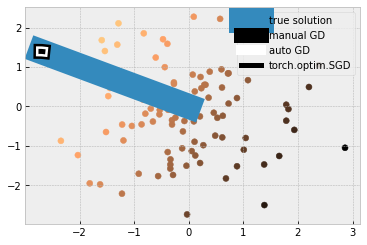

In [173]:
# now let's do some iterations of gradient descent on w and v
stepsize = 0.1 # a small one to help visualize
# we'll use pytorch's sgd for z:
z_optimizer = torch.optim.SGD([z], lr = stepsize)
# XXX note to future matus: gotcha about not modifying z directly
n_iters = 20
V = torch.empty(n_iters, 2)
W = torch.empty(n_iters, 2)
Z = torch.empty(n_iters, 2)
for i in range(n_iters):
    # let's save all iterates to plot them later
    V[i, :] = v
    # for w and z, if we copy them in like v, then
    # W also gets requires_grad enabled.
    # We can use .detach() to disconnect from the computation graph
    W[i, :] = w.detach()
    Z[i, :] = z.detach()

    # manual gradient computation on v:
    v_risk = ((X @ v - y) ** 2 / 2).mean()
    # take a gradient step:
    v -= stepsize * X.T @ (X @ v - y) / X.shape[0]
    
    # automatic gradient computation on w:
    w_risk = ((X @ w - y) ** 2 / 2).mean()
    # following line means
    # "go through the computation of 'w_risk',
    # and save gradient information for 
    # tensors with all requires_grad=True"
    w_risk.backward()

    # we still need _use_ the saved gradient information
    

    with torch.no_grad():
        # we will do that inside a torch.no_grad() block.
        # this  means "here we do not track gradient computations".
        # this particular gradient computation blows up in various
        # ways without the block.
        # for v we were fine, there are no requires_grad variables.
        w -= stepsize * w.grad
        # w.grad is where gradient information was stored.
        # we must explicitly clear it, or else it will be combined
        # with future iteration gradient information
        w.grad.zero_()
        # the .zero_() means "zero this out in place".
        #w = w - stepsize * w.grad
        
    # now let's do z
    z_optimizer.zero_grad() # the optimizer handles this now
    # rest is familiar from w:
    z_risk = ((X @ z - y) ** 2 / 2).mean()
    z_risk.backward()
    # now do the update.  torch.no_grad() is unnecessary
    # because .step() invokes it internally.
    z_optimizer.step() # thanks, pytorch
    
    # lastly let's print the empirical risk of all
    with torch.no_grad():
        print(f"iter {i}"
              f" risk {v_risk:.3g} {w_risk:.3g} {z_risk:.3g}")

with plt.style.context("bmh"):
    plt.scatter(
        X[:, 0],
        X[:, 1],
        # color according to y:
        c = (y - y.min()) / (y.max() - y.min()),
        cmap = "copper",
    )
    plt.plot([0, u[0]], [0, u[1]], lw = 25, label = "true solution")
    plt.plot(V[:, 0], V[:, 1],
             lw = 15, color = 'black',
             label = "manual GD")
    plt.plot(W[:, 0], W[:, 1],
             lw = 10, color = 'white',
             label = "auto GD")
    plt.plot(Z[:, 0], Z[:, 1],
             lw = 5, color = 'black',
             label = "torch.optim.SGD")
    plt.legend()    

In [174]:
# Let's take a moment to study the last w_risk
w_risk

tensor(1.5536e-05, grad_fn=<MeanBackward0>)

In [176]:
# the "grad_fn" is also part of the computation tracking.
# if we use .detach() here, similarly it clears this.
w_risk.detach()

tensor(1.5536e-05)

In [181]:
w = torch.randn(())
print(1, w, w.shape)
print(2, w.item(), w.detach(), w.detach().clone(), w.item() )
print(3, w.view(-1,1,1))

1 tensor(-0.6272) torch.Size([])
2 -0.6271902918815613 tensor(-0.6272) tensor(-0.6272) -0.6271902918815613
3 tensor([[[-0.6272]]])


In [207]:
# here's an example of what goes wrong within torch.no_grad.
w2 = torch.randn(2, requires_grad = True)
print(w2.shape)
risk = ((X @ w2 - y) ** 2 / 2).mean()
risk.backward()
with torch.no_grad():
    # WRONG WAY: assign to a temporary variable
    w3 = w2 - stepsize * w2.grad
    print(w3)
    # RIGHT WAY: in place operations.
    w2 -= stepsize * w2.grad
    print(w2)
    # same goes with other operations like torch.clamp(), etc.
    # notice that one of the following changes
    print(w3.requires_grad, w2.requires_grad)

torch.Size([2])
tensor([0.2936, 0.1617])
tensor([0.2936, 0.1617], requires_grad=True)
False True


In [208]:
# note that "autodifferentiation" doesn't require differentiability.
w = torch.zeros((), requires_grad = True) # scalar zero
print(w)
nondiff = torch.nn.functional.relu(w)
nondiff.backward()
# relu is not differentiable at zero...
print(w.grad)
# relu has clarke differential (and subdifferential) of [0,1] at 1.
# so anything within [0,1] seems reasonable.

tensor(0., requires_grad=True)
tensor(0.)


In [215]:
# good job, pytorch, how about this one.
w.grad.zero_() # first zero out old gradient
relu = torch.nn.functional.relu # shorthand
print(relu(torch.tensor(-1)))
print(w)
tricky = relu(w) - relu(-w) # identity map
tricky.backward()
print(w.grad) # 1 is the only correct value

tensor(0)
tensor(0., requires_grad=True)
tensor(0.)


# single-layer networks

In [219]:
# a basic fully connected layer; randomly initialized
fc1 = torch.nn.Linear(5,4, bias = True)
# another one, different random init:
fc2 = torch.nn.Linear(5,4, bias = True)

# let's apply these layers to some data
x = torch.randn(5)
# you can call them like functions.  result nonzero due to random init.
print((fc1(x) - fc2(x)).norm())

tensor(0.9514, grad_fn=<NormBackward1>)


In [225]:
# A layer is itself a subclass of the general torch network class
print(1, isinstance(fc1, torch.nn.Module))
# this class contains main convenient operations.
# here are two ways to apply them to data:
print(2, x, (fc1(x)), (fc1.forward(x)))
# note that .forward()'s name matches with .backward(),
# corresponding to backpropagation.
# here we see we can print networks, useful for debugging:
print(3, fc1)

1 True
2 tensor([-0.8801,  0.8221, -1.0856, -0.1317, -0.4591]) tensor([0.2786, 0.7801, 0.4324, 0.4789], grad_fn=<AddBackward0>) tensor([0.2786, 0.7801, 0.4324, 0.4789], grad_fn=<AddBackward0>)
3 Linear(in_features=5, out_features=4, bias=True)


In [227]:
# torch.nn.Module instances can iterate over parameters.
# most often we use this to define gradient descent
for P in fc1.parameters():
    print(P.shape)

torch.Size([4, 5])
torch.Size([4])


In [228]:
# what about with no bias?
for P in torch.nn.Linear(5,4, bias = False).parameters():
    print(P.shape)

torch.Size([4, 5])


In [229]:
# this zeros out gradients.
fc1.zero_grad()
# it is like accessing the weights (and biases!) within fc1
# and calling .zero_().

In [230]:
fc = torch.nn.Linear(5, 1)
# torch networks can take minibatches directly as input;
# now the inputs are written as rows.
X = torch.randn(10, 5)
print(1, fc(X[0, :]).shape) # column vector in, singleton vector out
print(2, fc(X).shape) # matrix in, _matrix_ out
print(3, fc(X[:5, :]).shape) # now with a minibatch

1 torch.Size([1])
2 torch.Size([10, 1])
3 torch.Size([5, 1])


In [239]:
# Typically pytorch code does not directly extract minibatches from
# a big data tensor, but uses wrappers from torch.utils.data
nb = 32
n = 256
# following wraps inputs and outputs into single object
data = torch.utils.data.TensorDataset(
    torch.arange(n).type(torch.float32), # our fake input data
    # using sequential data to tell apart shuffle and not
    torch.randint(0, 10, (n,)) # our labels
)
for shuffle in [ False, True ]:
    # DataLoader handles minibatching
    loader = torch.utils.data.DataLoader(data, batch_size = nb,
                    shuffle = shuffle, num_workers = 1)
    # loader exposes an iterable interface:
    for (i, (Xb, yb)) in enumerate(loader):
        print(f"shuffle {shuffle} {i} {Xb.min() / nb:.3g}")

shuffle False 0 0
shuffle False 1 1
shuffle False 2 2
shuffle False 3 3
shuffle False 4 4
shuffle False 5 5
shuffle False 6 6
shuffle False 7 7
shuffle True 0 0
shuffle True 1 0.25
shuffle True 2 0.312
shuffle True 3 0.0312
shuffle True 4 0.375
shuffle True 5 0.125
shuffle True 6 0.219
shuffle True 7 0.0625


In [240]:
# here's a gotcha!
# for linear logistic regression, we did y * (X @ w).  now:
y = torch.randn(X.shape[0])
print((y * fc(X)).shape) # OOPS
print((y * fc(X).view(-1)).shape) # correct...

torch.Size([10, 10])
torch.Size([10])


In [241]:
# We can also move entire networks to gpu with one function call
# (in this case, it moves the weights and the biases).
fc.to(device)

Linear(in_features=5, out_features=1, bias=True)

In [242]:
lin = torch.nn.Linear(4,5)
lin(torch.randn(3,4))

tensor([[ 0.3565, -0.2780, -0.1114,  0.2070,  0.6107],
        [ 0.3952,  0.8698, -0.4732,  0.8989, -0.0087],
        [ 0.5284,  0.6278, -0.5267,  0.2494,  0.9822]],
       grad_fn=<AddmmBackward0>)

In [243]:
# We can also create convolutional layers easily
torch.nn.Conv2d(5, 4, 2)
conv = torch.nn.Conv2d(5, 4, 2)
# example random data with 10 6x6 images using 5 channels:
X = torch.randn(10, 5, 6, 6)
print(1, conv(X[:1, ...]).shape) #output on first example
print(2, conv(X).shape) #output on whole batch
try:
    # unfortunately, unlike for linear layers,
    # we _must_ use inputs with 4 axes of input
    print(3, conv(X[0, ...]).shape)
except Exception as E:
    print(4, f"Got exception: '{E}'")
# just a sanity check:
# indeed convolutional layers, unlike linear layers,
# can handle different choices of input width x height
print(5, conv(torch.randn(10, 5, 10, 10)).shape)

1 torch.Size([1, 4, 5, 5])
2 torch.Size([10, 4, 5, 5])
3 torch.Size([4, 5, 5])
5 torch.Size([10, 4, 9, 9])


In [45]:
# convolutional layers also have biases on by default!
for P in conv.parameters():
    print(P.shape)

torch.Size([4, 5, 2, 2])
torch.Size([4])


In [46]:
# activations also subclass torch.nn.Module
relu = torch.nn.ReLU()
print(1, relu)
print(2, len(list(relu.parameters())))
v = torch.linspace(-3, 3, 7)
print(3, relu(v))
# many layer types can also be invoked "functionally",
# without creating a layer object.
print(4, torch.nn.functional.relu(v))
# we can also call relu directly on tensors.
print(5, v.relu())

1 ReLU()
2 0
3 tensor([0., 0., 0., 0., 1., 2., 3.])
4 tensor([0., 0., 0., 0., 1., 2., 3.])
5 tensor([0., 0., 0., 0., 1., 2., 3.])


In [47]:
# We also have softmax layers...
v = torch.randn(4)
softmax = torch.nn.Softmax(dim = 0)
print(1, softmax(v))
print(2, torch.nn.functional.softmax(v, dim = 0))
print(3, v.softmax(dim = 0))
# let's sanity check 
print(4, v.exp() / v.exp().sum())

1 tensor([0.3339, 0.4058, 0.1528, 0.1075])
2 tensor([0.3339, 0.4058, 0.1528, 0.1075])
3 tensor([0.3339, 0.4058, 0.1528, 0.1075])
4 tensor([0.3339, 0.4058, 0.1528, 0.1075])


In [48]:
# Let's further sanity check softmax with cross entropy
yhat = v.view(1, -1)
y = torch.ones(1,).type(torch.long)
print(1, torch.nn.functional.cross_entropy(yhat, y))
# It also exists as a layer!
risk = torch.nn.CrossEntropyLoss()
assert(len(list(risk.parameters())) == 0)
print(2, risk(yhat, y))
# variable name "risk" because averages batches:
yhat = torch.randn(10, 5)
y = torch.randint(0, yhat.shape[1], (yhat.shape[0],))
risk1 = risk(yhat, y)
assert(len(risk1.shape) == 0)
# lastly let's check the computation manually.
# pytorch has .logsumexp() for numerical reasons;
# following slicing has a tiny gotcha, can't use : in place of range.
risk2 = (- yhat[torch.arange(10), y] + yhat.logsumexp(dim = 1)).mean()
# another way
risk3 = -yhat.softmax(dim = 1)[torch.arange(10), y].log().mean()
assert((risk2 - risk1).abs().item() < 1e-6 and
      (risk3 - risk2).abs().item() < 1e-6)

1 tensor(0.9020)
2 tensor(0.9020)


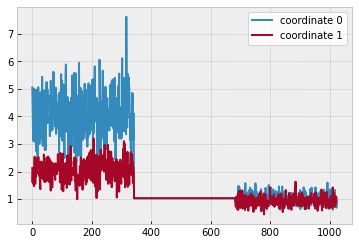

In [49]:
# Lastly, let's study batch norm a little bit.
# Let's play with the .train() and eval() routines,
# and also see if we can observe the normalization.
d = 2
bn = torch.nn.BatchNorm1d(d)
bn.eval() # disable tracking of statistics
# Gaussian data, axis aligned, different variances.
X = torch.randn(1024, d) @ torch.tensor([[4.0, 0,], [0, 2]])
n_iters = 1024
stddevs = torch.empty(n_iters, d)
import random
for iters in range(n_iters):
    x_mb = X[random.sample(range(X.shape[0]), 16), :]
    out = bn(x_mb)
    with torch.no_grad():
        if iters == n_iters // 3:
            bn.train()
        elif iters == 2 * n_iters // 3:
            bn.eval()
        stddevs[iters, :] = out.std(dim = 0)
with plt.style.context('bmh'):
    for j in range(d):
        plt.plot(range(n_iters), stddevs[:, j],
                 label = f"coordinate {j}")
plt.legend()

In [50]:
# note that batch norm has those "affine" parameters by default.
# we did not do any updates do them, so they're still default.
for P in bn.parameters():
    print(P.data)

tensor([1., 1.])
tensor([0., 0.])


# multi-layer networks

In [51]:
# now let's work with multi-layer networks.
# for networks that just stack standard types of layers,
# here is an easy way:
net = torch.nn.Sequential(
    torch.nn.Linear(5,100),
    torch.nn.ReLU(), 
   # torch.nn.Linear(100,1)
)
# note that "number layers" is already ambiguous and inconsistent
# across neural net conventions...

# we still have .forward(), function call, .zero_grad(), 
#net(x)
net(torch.randn(5))
print([1,])

[1]


In [52]:
print(net) # compare this with printing just torch.nn.Linear

Sequential(
  (0): Linear(in_features=5, out_features=100, bias=True)
  (1): ReLU()
)


In [53]:
# since now we have multiple layers,
# .parameters() may be confusing for debugging purposes
# since each layer can have multiple parameters (e.g., due to bias).
# instead, we can use .named_parameters().
# here we can see the default names:
for (Pname, P) in net.named_parameters():
    print(Pname, P.shape)

0.weight torch.Size([100, 5])
0.bias torch.Size([100])


In [54]:
# also convenient to define networks as classes.
class SquaredReLUNet(torch.nn.Module):
    def __init__(self, d, width):
        super(SquaredReLUNet, self).__init__() # boilerplate
        self.d = d
        self.width = width
        self.fc1 = torch.nn.Linear(d, width, bias = False)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(width, 1, bias = False)
        # torch.nn.Module "sees" fc1 and fc2 and they are
        # accessed by operations like zero_grad(), parameters(), etc.
        # for more exotic architectures, you need to
        # manually register with self.add_module().
        
    def forward(self, x):
        x = self.fc1(x)
        # squared ReLU; more convenient than with torch.nn.Sequential
        x = self.relu(x) ** 2
        return self.fc2(x)
    
net = SquaredReLUNet(5, 128)
net(torch.randn(50, 5)).shape

torch.Size([50, 1])

In [55]:
net.zero_grad() # let's clear all gradient information.
(X, y) = (torch.randn(50, 5), torch.randn(50))
risk = ((net(X).view(-1) - y) ** 2).mean() / 2 # note ".view(-1)"
risk.backward()
with torch.no_grad():
     # they all get magically registered in the __init__
    for (Pi, P) in enumerate(net.parameters()):
        print(Pi, P.shape, P.grad.shape)
        P -= 0.01 * P.grad # in place operations !
    
    # it is possible that it doesn't decrease,
    # since the step size is fixed but the random data could be wild...
    print(f"risk should decrease: init {risk:.3g}, "
           f"one iter {(((net(X).view(-1) - y) ** 2).mean() / 2):.3g}")

0 torch.Size([128, 5]) torch.Size([128, 5])
1 torch.Size([1, 128]) torch.Size([1, 128])
risk should decrease: init 0.547, one iter 0.54


# Digit experiment

torch.Size([1797, 64]) torch.Size([10]) tensor(16.) tensor(0.)


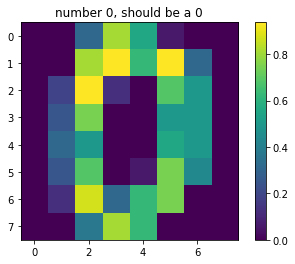

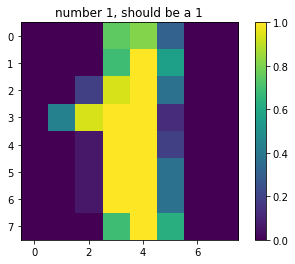

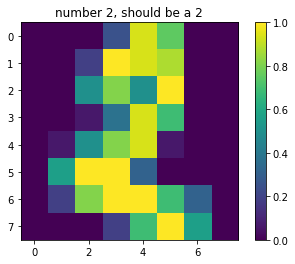

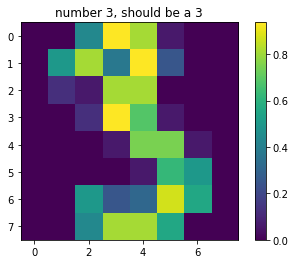

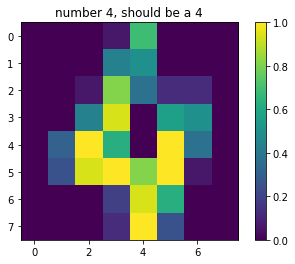

In [245]:
import sklearn.datasets
sk_digits = sklearn.datasets.load_digits()
(X, Y) = (torch.tensor(sk_digits.data).type(torch.float), torch.tensor(sk_digits.target))
print(X.shape, y.shape, X.max(), X.min())
X /= X.max()
for i in range(5):
    plt.figure(1 + i)
    ax = plt.imshow(X[i, ...].view(-1, 8))
    plt.colorbar(ax)
    plt.title(f"number {i}, should be a {Y[i]}")

In [248]:
import random
n = X.shape[0]
perm = list(range(n))
random.shuffle(perm)
(X, Y) = ({'tr': X[perm[:n//2], ...], 'te': X[perm[n//2:], ...]}, {'tr':Y[perm[:n//2]], 'te':Y[perm[n//2:]]})

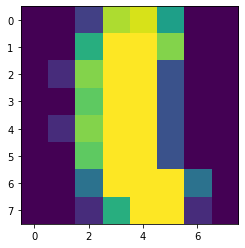

In [249]:
plt.imshow(X['tr'][0, ...].view(-1,8))

49 1.886 1.879
99 1.150 1.122
149 0.634 0.663
199 0.500 0.466
249 0.317 0.369
299 0.203 0.312
349 0.211 0.277
399 0.209 0.246
449 0.131 0.228
499 0.136 0.219
549 0.194 0.203
599 0.142 0.201
649 0.109 0.186
699 0.127 0.179
749 0.155 0.174
799 0.147 0.173
849 0.102 0.164
899 0.156 0.163
949 0.089 0.159
999 0.073 0.155
1049 0.090 0.154
1099 0.074 0.151
1149 0.083 0.147
1199 0.037 0.145
1249 0.071 0.147
1299 0.067 0.143
1349 0.037 0.139
1399 0.094 0.140
1449 0.053 0.136
1499 0.071 0.137
1549 0.057 0.136
1599 0.042 0.133
1649 0.040 0.133
1699 0.056 0.130
1749 0.073 0.128
1799 0.072 0.129
1849 0.047 0.126
1899 0.071 0.127
1949 0.042 0.126
1999 0.050 0.125
2049 0.064 0.125
2099 0.052 0.125
2149 0.031 0.124
2199 0.072 0.123
2249 0.033 0.123
2299 0.039 0.123
2349 0.026 0.121
2399 0.037 0.122
2449 0.042 0.121
2499 0.019 0.122
2549 0.040 0.122
2599 0.027 0.120
2649 0.036 0.120
2699 0.043 0.120
2749 0.045 0.117
2799 0.027 0.116
2849 0.037 0.118
2899 0.042 0.118
2949 0.023 0.116
2999 0.037 0.118
30

<ipython-input-250-6c0358fd23d2>:63: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(2 + 10 * net_i + 2 * j + 1)


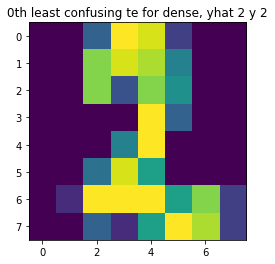

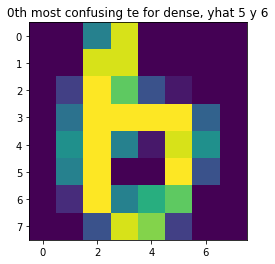

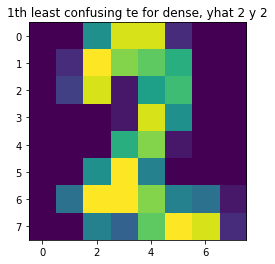

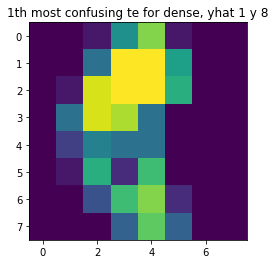

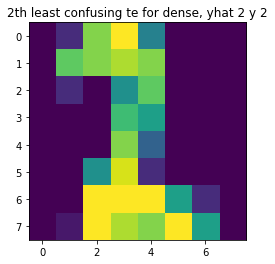

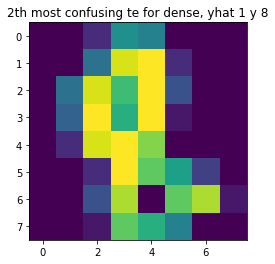

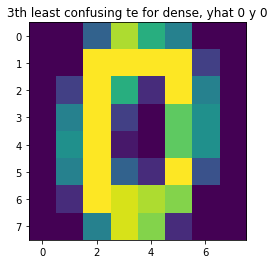

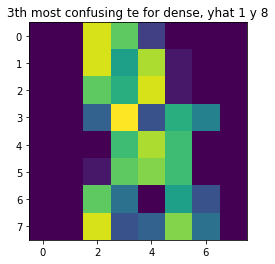

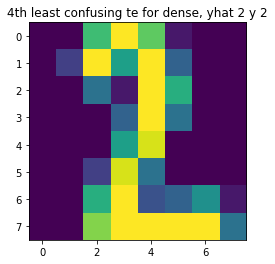

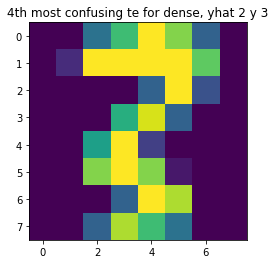

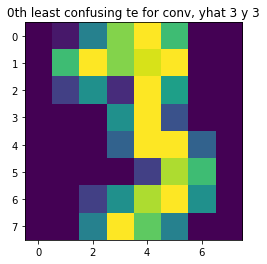

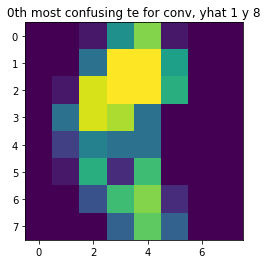

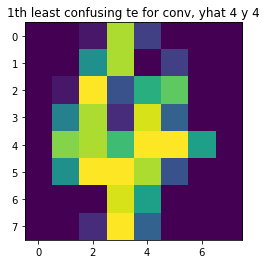

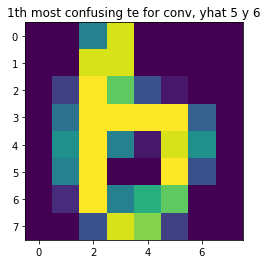

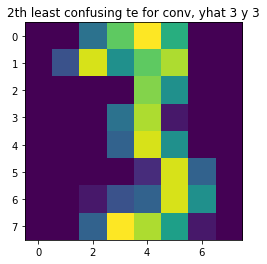

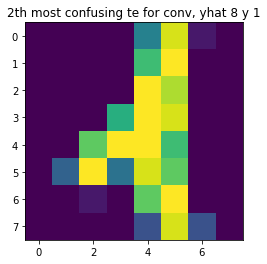

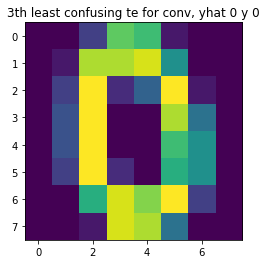

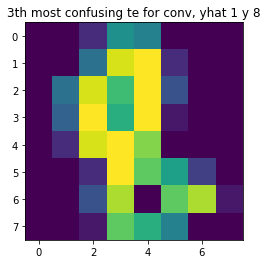

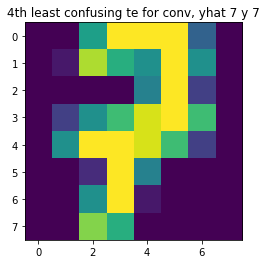

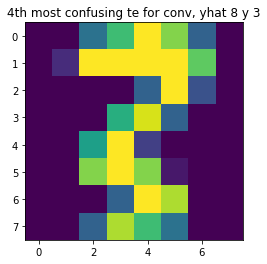

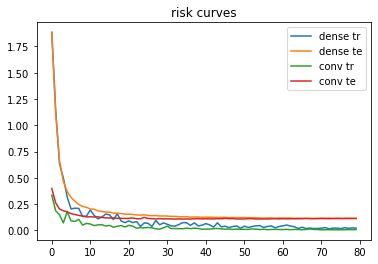

In [250]:
width = 64
mb_sz = 128

net1 = torch.nn.Sequential(
    torch.nn.Linear(X['tr'].shape[1], width),
    torch.nn.ReLU(),
    torch.nn.Linear(width, len(sk_digits.target_names)),
)

class Net2(torch.nn.Module):
    def __init__(self, width):
        super(Net2, self).__init__() # boilerplate
        self.conv = torch.nn.Conv2d(1, width, kernel_size = 3)
        self.relu = torch.nn.ReLU()
        self.fc = torch.nn.Linear(6 * 6 * width, 10)
        
    def forward(self, x):
        x = x.view(x.shape[0], 1, 8, 8)
        x = self.conv(x)
        x = self.relu(x)
        x = x.view(x.shape[0], -1)
        return self.fc(x)
net2 = Net2(width)
    
for (net_i, (net_s, net, stepsize)) in enumerate([
    ('dense', net1, 0.1), 
    ('conv',  net2, 0.1),
]):
    losses = { 'tr' : [], 'te' : [] }
    for i in range(4000):
        net.zero_grad()
        idxs = random.sample(range(X['tr'].shape[0]), mb_sz)
        (x, y) = (X['tr'][idxs, ...], Y['tr'][idxs])
        yhat = net(x)
        # bakes in ".mean()":
        loss = torch.nn.CrossEntropyLoss()(yhat, y)
        loss.backward()
        with torch.no_grad():
            if (i + 1) % 50 == 0: 
                yhat2 = net(X['te'])
                loss2 = torch.nn.CrossEntropyLoss()(yhat2, Y['te'])
                print(f"{i} {loss:.3f} {loss2:.3f}")
                losses['tr'].append(loss.detach())
                losses['te'].append(loss2.detach())

            for P in net.parameters():
                P -= stepsize * P.grad
    for s in ['tr', 'te']:
        plt.figure(1)
        plt.plot(range(len(losses[s])), losses[s],
                 label = f"{net_s} {s}")

    with torch.no_grad():
        yhat2 = net(X['te'])
        loss2 = torch.nn.CrossEntropyLoss(reduction = 'none')(yhat2, Y['te'])
        loss2_sort = loss2.sort()
        for j in range(5):
            plt.figure(2 + 10 * net_i + 2 * j)
            idx = loss2_sort.indices[j]
            yhat2_single = yhat2[idx, ...].argmax().item()
            plt.imshow(X['te'][idx, ...].view(8,8))
            plt.title(f"{j}th least confusing te for {net_s}, yhat {yhat2_single} y {Y['te'][idx]}")
            plt.figure(2 + 10 * net_i + 2 * j + 1)
            idx = loss2_sort.indices[-1-j]
            yhat2_single = yhat2[idx, ...].argmax().item()
            plt.imshow(X['te'][idx, ...].view(8,8))
            plt.title(f"{j}th most confusing te for {net_s}, yhat {yhat2_single} y {Y['te'][idx]}")

plt.figure(1)
plt.title("risk curves")
plt.legend()
plt.show()

In [251]:
for P in net2.parameters():
    print(P.shape)

torch.Size([64, 1, 3, 3])
torch.Size([64])
torch.Size([10, 2304])
torch.Size([10])
